# ETAPAS REALIZADAS

# Pre-processing data


## Mergin files mulher and gravidezes

In [23]:
import pandas as pd
db_mulher = pd.read_csv("clustering/mulher_values.csv", sep = ';',low_memory=False)
db_gravidezes = pd.read_csv("clustering/gravidezes_values.csv", sep = ';',low_memory=False)
db_joined = pd.merge(db_mulher, db_gravidezes, on='CM000_NQUE')
db_joined

,REC$TYPE_x,DOMICILIO_ID_x,MULHER_ID_x,Merge_mulher,CM000_NQUE,CM000A_QUES_x,CM002_CONG_x,CM003_ESTR_x,CM004_MACR_x,CM008_SITU_x,...,M268_AUME,M269_CONV,M270_CONV,M271_SANG,M272_SANG,M273_TRAN,M274_FEBR,M275_CALA,M276_CORR,XG999_PESO
0,210,1100010,110001002,,10001002,100010,1,1,1,1,...,2,,,2,2,,2,,,"1259,140021"
1,210,1100010,110001002,,10001002,100010,1,1,1,1,...,2,,,2,2,,2,,,"1259,140021"
2,210,1100010,110001002,,10001002,100010,1,1,1,1,...,2,,,2,2,,2,,,"1259,140021"
3,210,1100020,110002002,,10002002,100020,1,1,1,1,...,2,,,2,2,,2,,,"2686,00803"
4,210,1100030,110003002,,10003002,100030,1,1,1,1,...,2,,,2,2,,2,,,"2038,006052"
5,210,1100080,110008002,,10008002,100080,1,1,1,1,...,1,1,2,1,2,,1,1,1,"1337,187856"
6,210,1100090,110009002,,10009002,100090,1,1,1,1,...,2,,,2,2,,2,,,"1784,200242"
7,210,1100100,110010002,,10010002,100100,1,1,1,1,...,2,,,2,2,,2,,,"1755,079355"
8,210,1100120,110012002,,10012002,100120,1,1,1,1,...,1,2,,1,2,,2,,,"1238,521825"
9,210,1100120,110012002,,10012002,100120,1,1,1,1,...,1,2,,1,2,,2,,,"1238,521825"


In [24]:
db_joined.to_csv("clustering/mulher_gravidezes.csv", sep=';')


## Analising values from merged file mulher_gravidezes

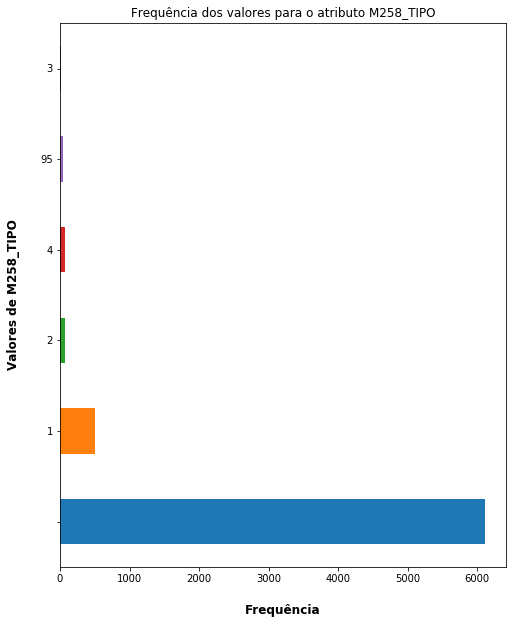

In [30]:
ax = db_joined['M258_TIPO'].value_counts(normalize = False).plot(kind='barh',  
                                                                 figsize=(8, 10), 
                                                                 title="Frequência dos valores para o atributo M258_TIPO")

  # Set x-axis label
ax.set_xlabel("Frequência", labelpad=20, weight='bold', size=12)
  # Set y-axis label
ax.set_ylabel("Valores de M258_TIPO", labelpad=20, weight='bold', size=12)

ax.get_figure().savefig("clustering/Frequência dos valores para o atributo M258_TIPO.png")

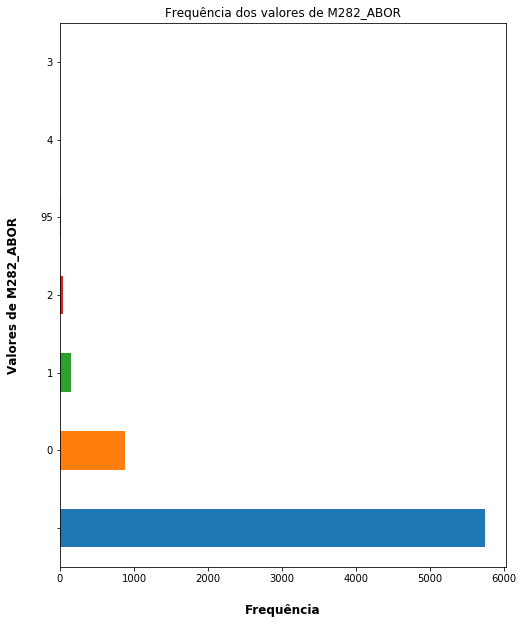

In [31]:
ax = db_joined['M282_ABOR'].value_counts(normalize = False).plot(kind='barh',  
                                                                 figsize=(8, 10),
                                                                 title = "Frequência dos valores de M282_ABOR")
  # Set x-axis label
ax.set_xlabel("Frequência", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Valores de M282_ABOR", labelpad=20, weight='bold', size=12)
ax.get_figure().savefig("clustering/Frequência dos valores para o atributo M282_ABOR.png")

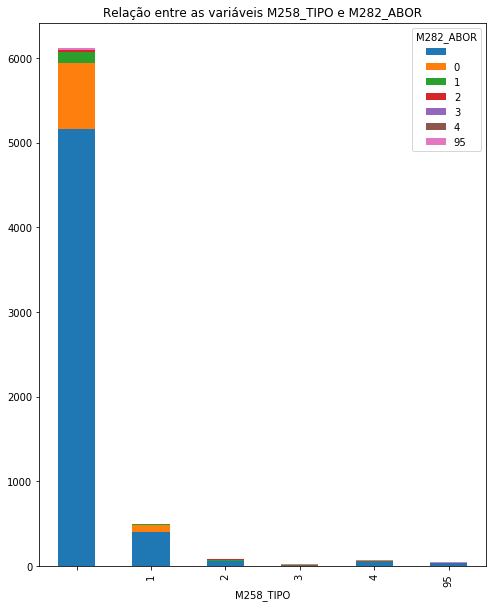

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

db_joined.groupby(['M258_TIPO','M282_ABOR']).size().unstack().plot(kind='bar',
                                                                   stacked=True,  
                                                                   figsize=(8, 10),
                                                                   title = 'Relação entre as variáveis M258_TIPO e M282_ABOR')
plt.show()
plt.savefig("Relação entre as variáveis M258_TIPO e M282_ABOR.png")

## Reading data from csv merged mulher_gravidezes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
dataframe =pd.read_csv("clustering/mulher_gravidezes.csv", sep = ';',low_memory=False)
dataframe.ndim

2

In [34]:
print(np.unique(dataframe['M282_ABOR']))
print(np.unique(dataframe['M258_TIPO']))

[' ' '0' '1' '2' '3' '4' '95']
[' ' '1' '2' '3' '4' '95']


## Couting missing data

In [35]:
#Função para porcentagem de dados faltantes:
def num_missing(x, size):
 return sum(x.eq(' '))*100/size 

#Aplica por coluna:
#print ("Missing values per column:")
dataframe_missing_collum = dataframe.apply(num_missing, axis=0, size = dataframe.shape[0])
#print (dataframe_missing_collum) #axis=0 define que a função deve ser aplicada em cada coluna

#Aplica por linha:
#print ("\nMissing values per row:")
dataframe_missing_row = dataframe.apply(num_missing, axis=1, size = dataframe.shape[1])
#print (dataframe_missing_row) #axis=1define que a função deve ser aplicada em cada linha


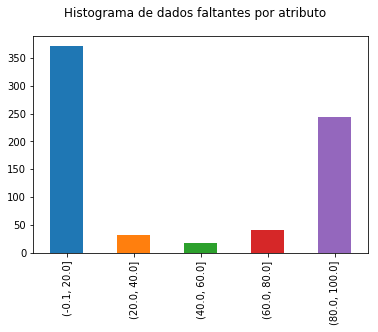

In [37]:
result_missing = pd.cut(dataframe_missing_collum, 5).value_counts().sort_index().plot.bar()
plt.suptitle("Histograma de dados faltantes por atributo")
plt.savefig('clustering/Histograma de dados faltantes por atributo.png')

## Counting 9* values

In [38]:
#Função para porcentagem de dados faltantes:
def num_outvalues(x, size):
    list_values = [95, 97,98, 99, 999999, 999995, 999997, 999998, 9995, 9998, 9997]
    outvalues = set(list_values)
    total = 0
    for y in x:
        if y in outvalues:
            total = total + 1
    return ((total*100)/size)
    #return sum(x.str.contains('|'.join(outvalues),regex=True))*100/size 

#Aplica por coluna:
#print ("99* values per column:")
dataframe_outvalues_collum = dataframe.apply(num_outvalues, axis=0, size = dataframe.shape[0])
#print (dataframe_outvalues_collum) #axis=0 define que a função deve ser aplicada em cada coluna

#Aplica por linha:
#print ("\n99* values per row:")
dataframe_outvalues_row = dataframe.apply(num_outvalues, axis=1, size = dataframe.shape[1])
#print (dataframe_outvalues_row) #axis=1define que a função deve ser aplicada em cada linha

#dataframe_outvalues_collum.sort_values()
#dataframe_outvalues_collum['M30207_CONH']

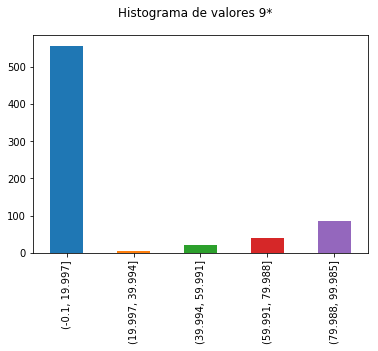

In [40]:
result = pd.cut(dataframe_outvalues_collum, 5).value_counts().sort_index().plot.bar()
plt.suptitle("Histograma de valores 9*")
plt.savefig('clustering/Histograma de valores 9_.png')

## Removing columns high missing rate

In [52]:
#order columns by missing hate
dataframe_missing_collum['M282_ABOR'] = 0
dataframe_missing_collum['M258_TIPO'] = 0
dataframe_missing_ordered = dataframe_missing_collum.sort_values(ascending=False)

#select all columns with more than X value of missing rate (80% for this case)
dataframe_missing_ordered = dataframe_missing_ordered.loc[dataframe_missing_ordered > 30]
dataframe_missing_ordered.shape
#dataframe_missing_ordered

(323,)

In [53]:
columns_to_remove = dataframe_missing_ordered.index.get_values().tolist()
dataframe_clean = dataframe.drop(columns_to_remove, inplace=False, axis=1)
print("Original size ", dataframe.shape, "Before cleaned", dataframe_clean.shape)


Original size  (6833, 706) Before cleaned (6833, 383)


## Removing columns with high outvalues

In [54]:
#order columns by missing hate
dataframe_outvalues_ordered = dataframe_outvalues_collum.sort_values(ascending=False)
dataframe_outvalues_ordered['M282_ABOR'] = 0
dataframe_outvalues_ordered['M258_TIPO'] = 0
#select all columns with more than X value of missing rate (80% for this case)
dataframe_outvalues_ordered = dataframe_outvalues_ordered.loc[dataframe_outvalues_ordered > 30]


In [55]:
columns_to_remove = dataframe_outvalues_ordered.index.get_values().tolist()
dataframe_clean = dataframe_clean.drop(columns_to_remove, inplace=False, axis=1)
print("Original size ", dataframe.shape, "Before cleaned again", dataframe_clean.shape)


Original size  (6833, 706) Before cleaned again (6833, 235)


## Saving to csv file

In [46]:
dataframe_clean.to_csv("clustering/dataset_cleaned.csv", encoding='utf-8', index=False)

# K-means

In [47]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import pylab as pl

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [48]:
from sklearn import preprocessing
df  = dataframe_clean
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

kmeans = KMeans(n_clusters=2).fit(df.fillna(0))
centroids = kmeans.cluster_centers_

In [49]:
print(kmeans.labels_)
df['K-classes'] = kmeans.labels_

[1 1 1 ... 0 0 0]


In [50]:
import seaborn as sns


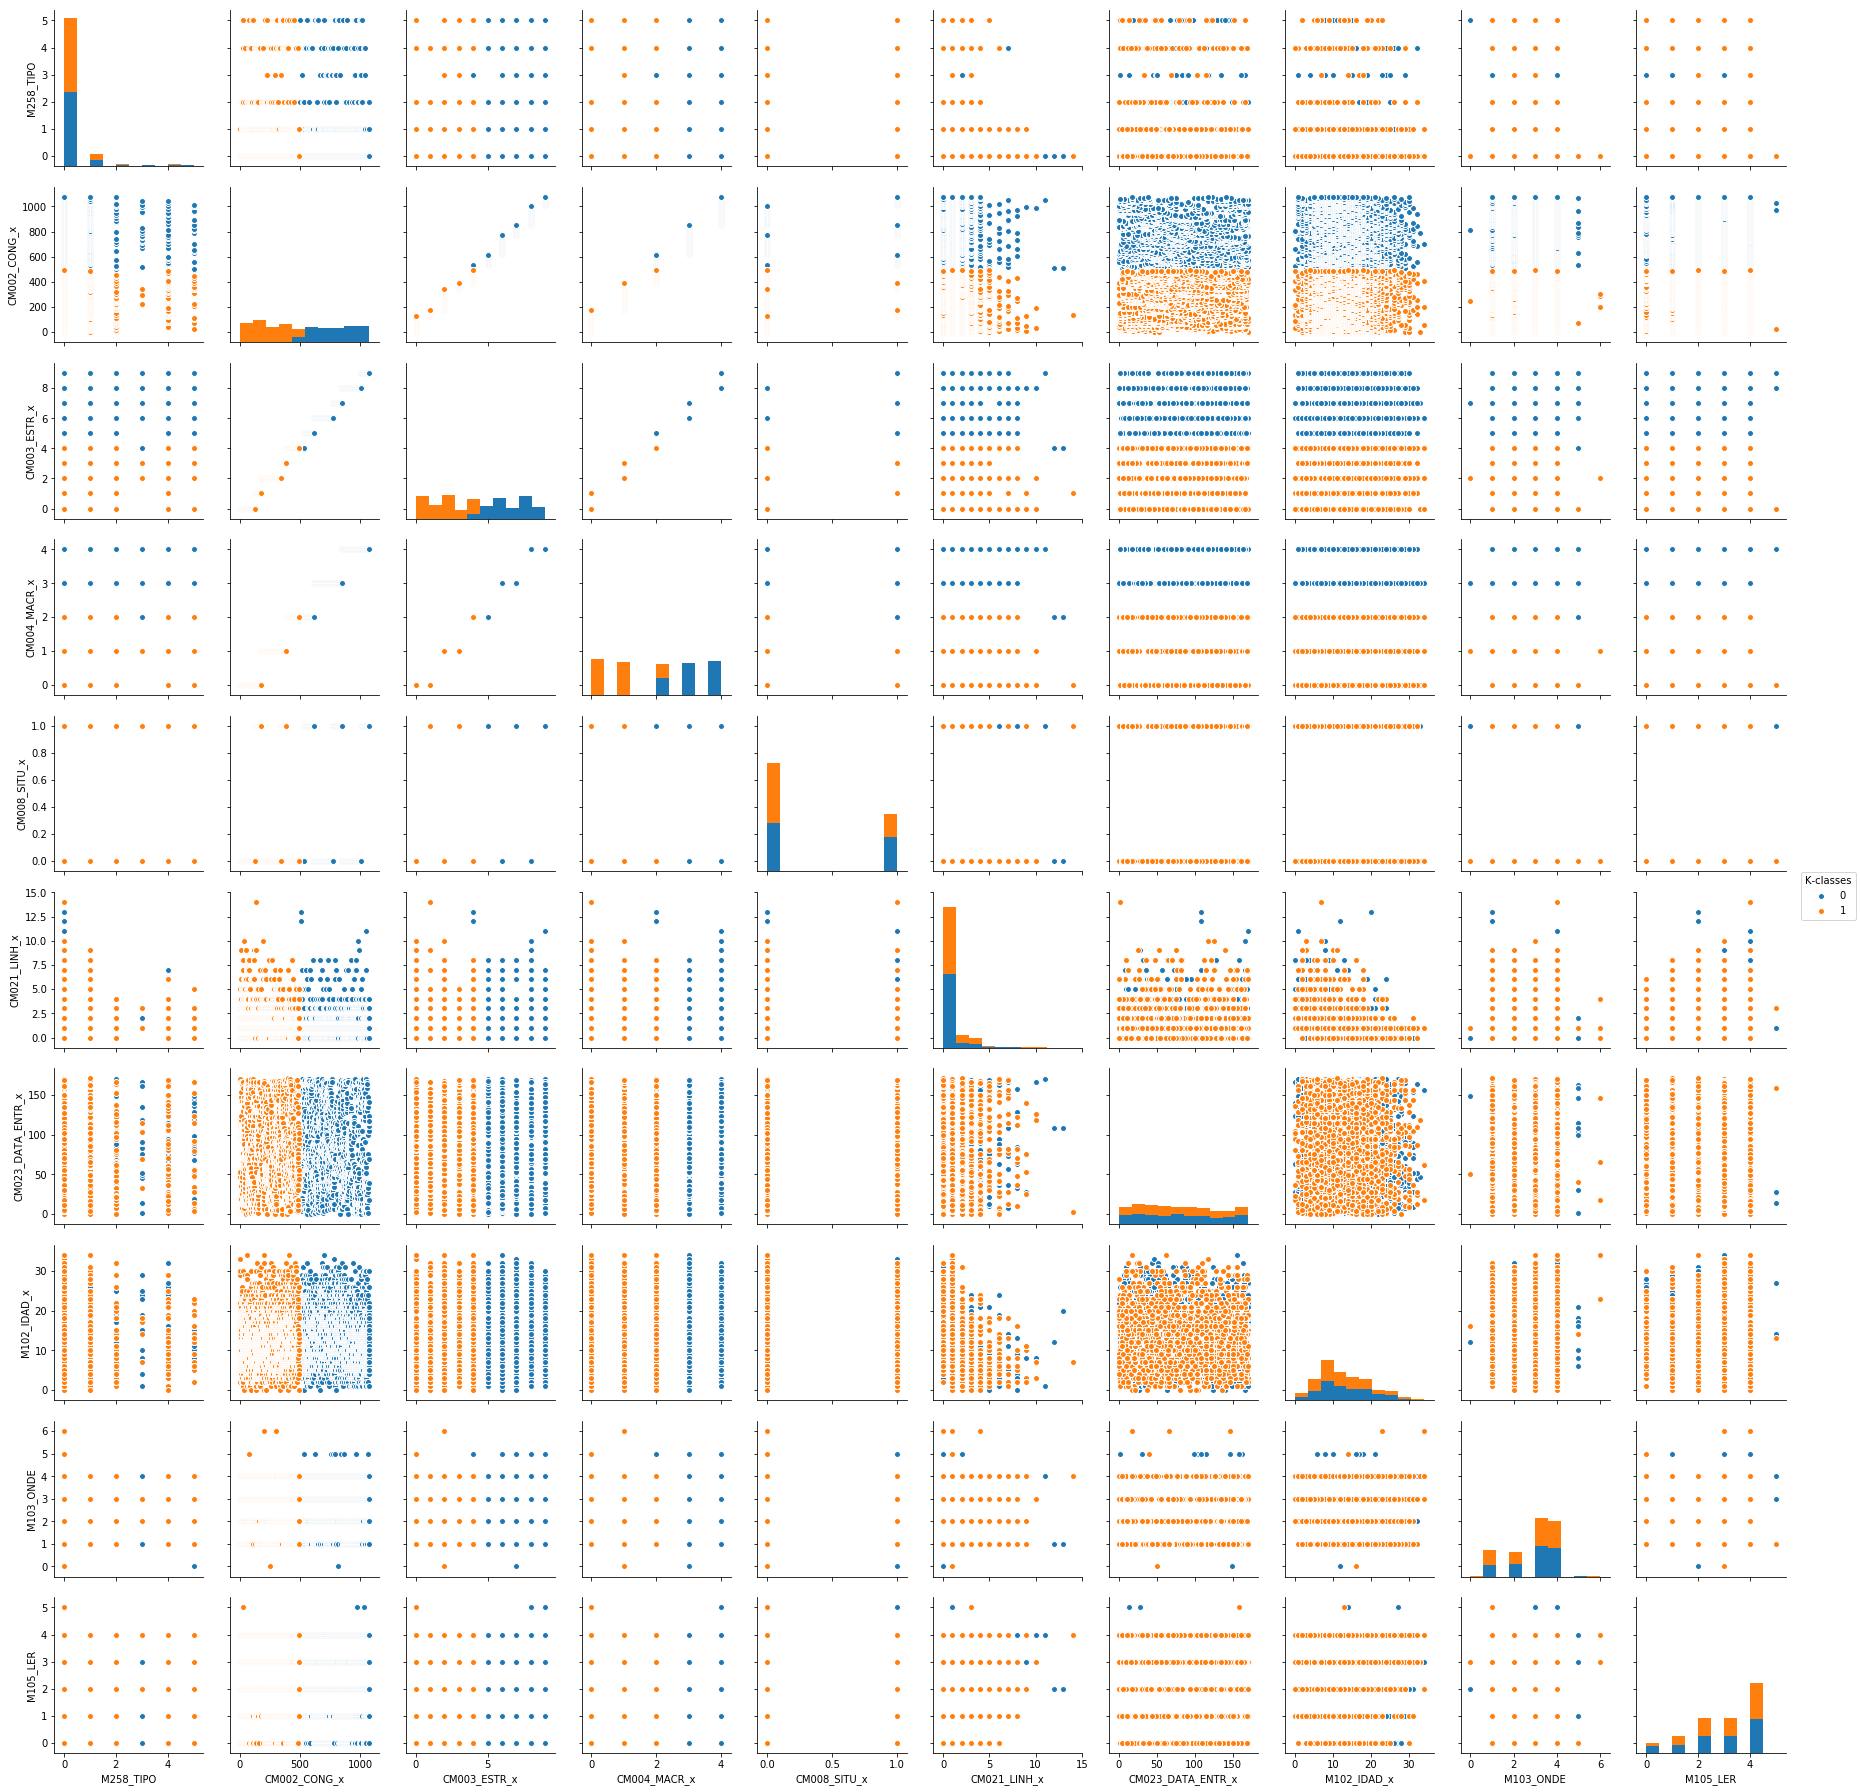

In [51]:
teste = sns.pairplot(df,vars = df.columns[:10], hue='K-classes')
teste.savefig("clustering/kmeans resultado 10 variaveis.png")